## Programming for Data Analyis Project Semester (2) 2020
Brendan Ryan GMIT

## Project Overview

For this project I have picked a real world phenomenon that exists in my own professional worplace which is a credit union.

That is what  is the likelyhood of a member of the financial institution I work in availing of a service (in this case avail of a loan), based on variables that are contained in a pre existing database - for my project I will look at the variables listed below

- AGE
- Month (month of application)
- Date (date of appliation)
- Employment Status
- Gender
- Loan Type
- Loan Amount Range
- Loan Amount


My main aim is to be able to determine the particular loan type that will be availabe of by Age and Gender.

#### Project Aims

The aim of this project is to extract and analyise a real world phenomenon which is lending by age profile and from this try and determine the probabilites of loan products by age group and gender.

I will do this analysis using Python code through a jupyter notebook and utilising various additional libraries will review and analise my dataset. 

In particular I want to look for any relationships between the variables and their likely distributions. 

From this research I then aim to create a synthetic simulated data set that will match as closely to my real world dataset. This simulated dataset could then be used for further testing and with a view to making predictions etc

#### How did i obtain the data?

I obtained the data from an internal system using Business Intellegince software. That software that was used was Pentago BI. 
I extracted the data I felt I needed (the varibales) and this data was extracted/exported to a csv file. This was ideal as phython and pandas is widely used to analysise data contained in the CSV file format. The CSV file is saved in my repository as analysis.csv. This csv does not contain any presonal information and is used more for identifying trends.

#### External Research of borrowing by Age profile

The majority of my analysis will be based around the data that i have extracted i.e the real life data. There is a wealth of data availabel online however i felt most of this data related more to the mortage market and outstanding debit where i am more interested in this particular project to look at new borrowing and the profile of same. However i feel that with this course and futher reading and experimenting i will do a project on loans outstading by difference demographics etc and analysise trends over a number of years. I will however include the following as i found them interesting and i will quote external sources in some of my findings as we analise the data further.

In the graph below which shows the number of products held by age profile in a sample financial instituion. It is intersting to note here that number of products held (including loans) starts to rise sharply from age 30 - peaking in the age group 45 - 54 and then delcining from age 55 onwards - it will be interesting to see if this is similar ot the patter or loans applied for by age groups in my dataset. - source https://www.cso.ie/en/releasesandpublications/ep/p-hfcs/householdfinanceandconsumptionsurvey2018/debtandcredit/

<img src="images/image1.jpg">

Again in the next graph we can see the Distribution of average debt from personal loans* in the United Kingdom (UK) 2017, by age profile - although this graph looks at the debt outstanding it also gives usa nother indication as to the age profile of peronal lending. - https://www.statista.com/statistics/793646/average-amount-owed-in-loans-uk/

<img src="images/image2.jpg">

As we can see from the graph above the main age mean is approx 40 years old increasing from age 25 upwards and declinning again from age 45 onwards - I would expect to see this follow through in the analysis of my own data set  -lets see

#### Getting Started

Import the required libraries

In [1]:
#code to import pandas is a software library for data manipulation and analysis
import pandas as pd
#code to import numpy for working with arrays scientific computer etc 
import numpy as np
#code to import matplotlib plotting library
import matplotlib.pyplot as plt
#code to import seaborn - more plots better visual
import seaborn as sns

Import our Data Set based on the output of ones years lending - we are going to use Pandas library to read and for analysing our data set.

In [2]:
#import my dataset and best practice name as df
df = pd.read_csv('analysis.csv')

## Test that our data set has loaded and check for errors 
** note maybe add in here only to load some rows

In [3]:
df
# I can if i want if its a large dataset only return lets say 100 rows ** come back to this 

,age,month_application,date_application,employment_status,gender,loan_purpose,loan_amount_range,loan_amount
0,19,October,04/10/2019,FULL TIME,Male,Car,"10,001 - 15,000",13000.0
1,19,August,28/08/2019,STUDENT,Male,Student,"1,001 - 5,000",3000.0
2,19,March,28/03/2019,FULL TIME,Male,Personal,"5,001 - 10,000",7000.0
3,19,September,28/09/2019,STUDENT,FEMALE,Student,"0 - 1,000",1000.0
4,19,August,22/08/2019,STUDENT,Male,Student,"5,001 - 10,000",10000.0
...,...,...,...,...,...,...,...,...
3931,85,June,07/06/2019,RETIRED,FEMALE,Personal,"0 - 1,000",600.0
3932,85,February,25/02/2019,RETIRED,FEMALE,Personal,"0 - 1,000",1000.0
3933,85,December,02/12/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3934,87,March,01/03/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0


Ok from above we can determine we have 3936 rows of date with 8 colums

#### df.head and df.tail
Now lets further analyse and examine our imported data by using df.head and df.tail functions that are available in pandas.

Firstly df.head() function returns the first 5 rows (default) -  both functions are useful for quickly testing if our dataset has the right type of data in it.

In [4]:
#pandas df.head fucntion default is to return 5 rows
df.head()

,age,month_application,date_application,employment_status,gender,loan_purpose,loan_amount_range,loan_amount
0,19,October,04/10/2019,FULL TIME,Male,Car,"10,001 - 15,000",13000.0
1,19,August,28/08/2019,STUDENT,Male,Student,"1,001 - 5,000",3000.0
2,19,March,28/03/2019,FULL TIME,Male,Personal,"5,001 - 10,000",7000.0
3,19,September,28/09/2019,STUDENT,FEMALE,Student,"0 - 1,000",1000.0
4,19,August,22/08/2019,STUDENT,Male,Student,"5,001 - 10,000",10000.0


In [5]:
#pands df.tail function by default reuturns last 5 rows 
df.tail()

,age,month_application,date_application,employment_status,gender,loan_purpose,loan_amount_range,loan_amount
3931,85,June,07/06/2019,RETIRED,FEMALE,Personal,"0 - 1,000",600.0
3932,85,February,25/02/2019,RETIRED,FEMALE,Personal,"0 - 1,000",1000.0
3933,85,December,02/12/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3934,87,March,01/03/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3935,89,March,28/03/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",3000.0


Everything looks ok above we can see the shape of our dataframe is correct

Lets have a look at the typoe of varibables we have to work with using the df.dtypes function 

In [6]:
#using pandas df.types to looking at the data types 
df.dtypes

age                    int64
month_application     object
date_application      object
employment_status     object
gender                object
loan_purpose          object
loan_amount_range     object
loan_amount          float64
dtype: object

Ok as we can see from above we are dealing with 3 different data types - 
- int64 for age
- object for the variables month_application,date_application, employment_status,gender,loan_purpose, loan_amount_range
- float64 for the loan_amount

Looking at the above results we can assertain that we need to covert the date of application to a date_time type rather than an object which it currently is

In [45]:
#look at making the Financial month a date time # help from https://https://pbpython.com/pandas_dtypes.html
#https://stackoverflow.com/questions/16852911/how-do-i-convert-dates-in-a-pandas-data-frame-to-a-date-data-type
pd.to_datetime(df['date_application'])

0      2019-04-10
1      2019-08-28
2      2019-03-28
3      2019-09-28
4      2019-08-22
          ...    
3931   2019-07-06
3932   2019-02-25
3933   2019-02-12
3934   2019-01-03
3935   2019-03-28
Name: date_application, Length: 3936, dtype: datetime64[ns]

In [63]:
df.describe().round(decimals = 0)

,age,loan_amount
count,3936.0,3936.0
mean,45.0,4756.0
std,16.0,8384.0
min,19.0,0.0
25%,32.0,700.0
50%,44.0,2000.0
75%,57.0,5000.0
max,89.0,102500.0


Ok as Age and Loan Amount are our only colums of type integer/floating points they are the only ones which will be returned for statistical values as shown above.

So using the pandas df.desribe function we get some insteresting statistics for the age and the loan amounts,
The average age of our borower is 45 years old, this corresponds with out reasearch above which showed the average age of a borrower as approx 40 years to 45 years. We can determine the average loan amount is approx €4,756. 
We will cross check these stats further on in our sythentic data set to make sure they align and to ensure our sythentic dataset is a valid represenation.


#### df.info()
Lets have a look at df.info which is another useful tool to give us more info on our dataframe

In [76]:
#using pandas built in function df.info to us more info including each data type in use
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                3936 non-null   int32   
 1   month_application  3936 non-null   category
 2   date_application   3936 non-null   object  
 3   employment_status  3936 non-null   category
 4   gender             3936 non-null   category
 5   loan_purpose       3936 non-null   category
 6   loan_amount_range  3936 non-null   object  
 7   loan_amount        3936 non-null   float64 
dtypes: category(4), float64(1), int32(1), object(2)
memory usage: 124.2+ KB


### Best practice convert some of our data types into categories

https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

The Pandas documentation has a consise section on when to use the categorical data type and they recommend it should be use the following data type:



- A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory, see here.

- The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order, see here.

- As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).

In [77]:
#convert required varibales to cateogories
df[["month_application","gender", "employment_status","loan_purpose"]] = df[["month_application","gender", "employment_status","loan_purpose"]].astype("category")

In [74]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                3936 non-null   int32   
 1   month_application  3936 non-null   category
 2   date_application   3936 non-null   object  
 3   employment_status  3936 non-null   category
 4   gender             3936 non-null   category
 5   loan_purpose       3936 non-null   category
 6   loan_amount_range  3936 non-null   object  
 7   loan_amount        3936 non-null   float64 
dtypes: category(4), float64(1), int32(1), object(2)
memory usage: 124.2+ KB


## Reviewing the data to figure out the types of distributions

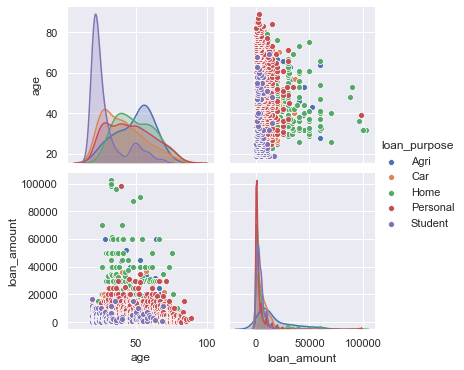

In [65]:
sns.pairplot(df,hue ="loan_purpose");

Count plot
This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value. Command for creating countplot is:

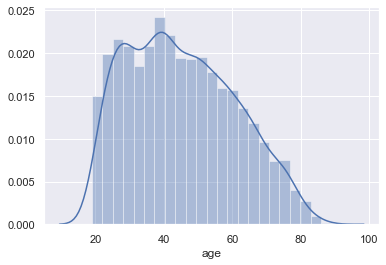

In [66]:
#df.Age.plot(kind='kde');
#df.groupby('Gender').Age.plot(kind='kde')
#df.Age.plot(kind='kde')
age = df["age"]
sns.distplot(age);

Visualising some relationships

Seaborn library has a great heat map visual tool that can be used to map the correlations between categories. The higher the number is the greater the correlation between the two elements. A high positive corrleation indicates that the two elements have a positive linear relationship (as one increases the other also increase), and a low negative correlation indicates a negative linear relationship( as one increases the other decreases)

link reference to medium here

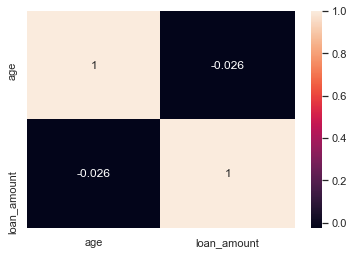

In [67]:
sns.heatmap(df.corr(),annot= True); #insert link here from medium that i used fro below

In [68]:
df.age.describe()

count    3936.000000
mean       45.241362
std        15.595089
min        19.000000
25%        32.000000
50%        44.000000
75%        57.000000
max        89.000000
Name: age, dtype: float64

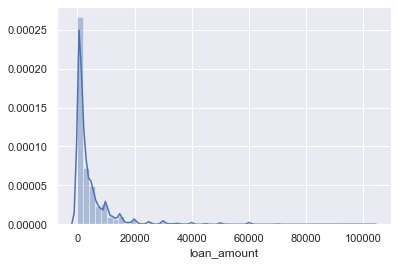

In [69]:
#df.Age.plot(kind='kde');
#df.groupby('Gender').Age.plot(kind='kde')
#df.Age.plot(kind='kde')
#Loan Amount = df["Loan Amount"]
sns.distplot(df["loan_amount"]);

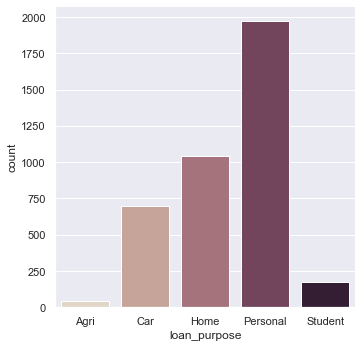

In [70]:
sns.catplot(x="loan_purpose", kind="count", palette="ch:.25", data=df)
#https://seaborn.pydata.org/tutorial/categorical.html

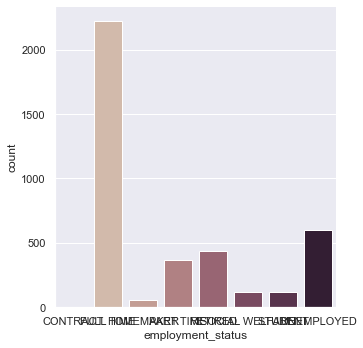

In [71]:
sns.catplot(x="employment_status", kind="count", palette="ch:.25", data=df);
#https://seaborn.pydata.org/tutorial/categorical.html

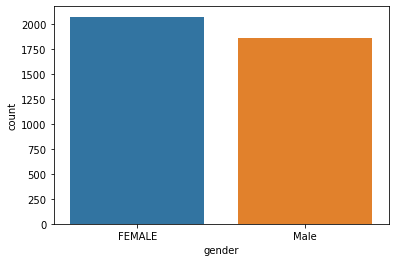

In [19]:
sns.countplot(x='gender',data=df)
#https://datascienceplus.com/seaborn-categorical-plots-in-python/

In [72]:
df[["gender","age"]].groupby("gender").count()
#https://pandas.pydata.org/pandas-docs/dev/getting_started/intro_tutorials/06_calculate_statistics.html

,age
gender,
FEMALE,2072
Male,1864


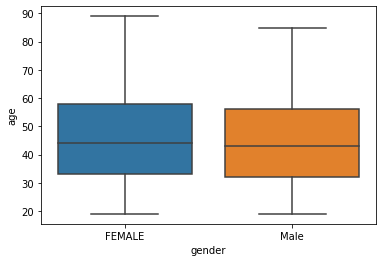

In [21]:
sns.boxplot(x='gender',y="age",data=df);

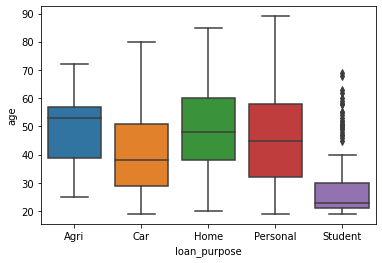

In [22]:
sns.boxplot(x='loan_purpose',y="age",data=df);

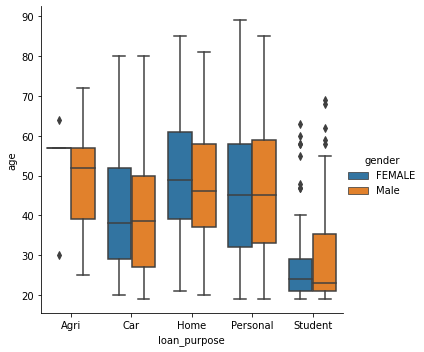

In [23]:
sns.catplot(x="loan_purpose", y="age", hue="gender", kind="box", data=df);
#https://seaborn.pydata.org/tutorial/categorical.html

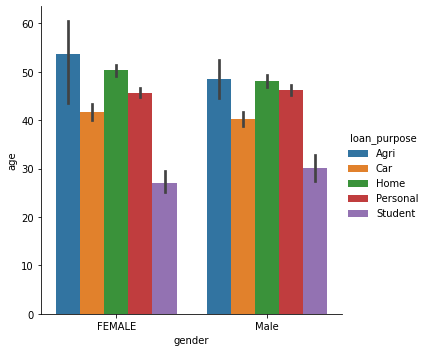

In [24]:
sns.catplot(x="gender", y="age", hue="loan_purpose", kind="bar", data=df);

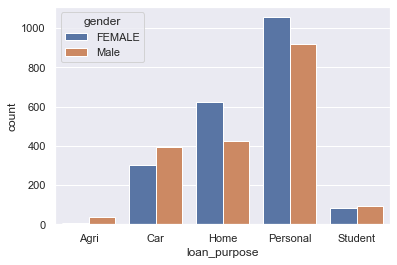

In [25]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='loan_purpose',hue="gender" , data=df)
plt.show()

In [26]:
#https://towardsdatascience.com/hands-on-python-data-visualization-seaborn-count-plot-90e823599012

## Create the sample random data



## AGE SAMPLE DATA

Start with the creation of the sample data as per the AGE - as we say above the distribtion of the Age varibale is closest aligned to that of a Normal Distribution

I am going to use the pands df.describe fuction to get the mean and standard deviation of the data in teh Age column - we will use thes as part
of our Numpy random.normal fucntion to get some random data

In [27]:
df.age.describe()

count    3936.000000
mean       45.241362
std        15.595089
min        19.000000
25%        32.000000
50%        44.000000
75%        57.000000
max        89.000000
Name: age, dtype: float64

Testing to see can i create some variables - neeed to set proabilty - how will i do this accross the varibales ? Maybe need a loop or functions?

In [28]:
n_samples = 4000
mean_age, deviation_age = 45.241362, 15.595089

In [29]:
Random_Age = np.random.randint(19, 89, n_samples)
#Random_Age = np.random.normal(45.241362,15.595089,n_samples).astype(int)

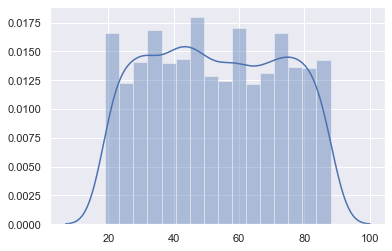

In [30]:
sns.distplot(Random_Age);

In [31]:
#sns.distplot(Age);
#df.groupby("Age").Loan.count()
#df.count(["Loan Purpose"])
#test = df['Loan Purpose'].count
#test

## LOAN TYPES SAMPLE DATA

In [32]:
sample_loan_types = df['loan_purpose'].unique().tolist()
#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
sample_loan_types

['Car', 'Student', 'Personal', 'Home', 'Agri']

In [33]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
#https://stackoverflow.com/questions/29403192/convert-series-returned-by-pandas-series-value-counts-to-a-dictionary
sample_loan_types_prob =dict(df['loan_purpose'].value_counts(True))
sample_loan_types_prob

{'Personal': 0.501270325203252,
 'Home': 0.2654979674796748,
 'Car': 0.17682926829268292,
 'Student': 0.04496951219512195,
 'Agri': 0.011432926829268292}

In [34]:
Random_Loan = np.random.choice(sample_loan_types, size=n_samples,p=[0.176829,0.044970,0.501270,0.265498,0.011433])
#0.176829,0.044970,0.501270,0.265498,0.011433
dftest = pd.DataFrame({'Random_Loan':Random_Loan})
probabilty_test =dict(dftest['Random_Loan'].value_counts(True))
probabilty_test

{'Personal': 0.49925,
 'Home': 0.26075,
 'Car': 0.18425,
 'Student': 0.04275,
 'Agri': 0.013}

## GENDER SAMPLE DATA

In [35]:
Gender = ("Male", "Female")
Random_Gender = np.random.choice(Gender,size = n_samples,p = [.45,.55])

#Random_Gender.describe
#Random_Gender

## Sample Loan amounts

In [36]:
df["loan_amount"].describe().round()

count      3936.0
mean       4756.0
std        8384.0
min           0.0
25%         700.0
50%        2000.0
75%        5000.0
max      102500.0
Name: loan_amount, dtype: float64

In [37]:
sample_loan_amounts_prob =dict(df['loan_amount'].value_counts(True))
#sample_loan_amounts_prob

In [38]:
#there must be a random choices in Numpy not just from standard libruary?
#https://stackoverflow.com/questions/4859292/how-to-get-a-random-value-from-dictionary-in-python
#https://stackoverflow.com/questions/40927221/how-to-choose-keys-from-a-python-dictionary-based-on-weighted-probability
import random
Random_Loan_Amount = random.choices(list(sample_loan_amounts_prob.keys()), weights=sample_loan_amounts_prob.values(), k=n_samples)
#random_loan_amounts

In [39]:
#create some random varibales just for testing at the minute
#researched https://www.delftstack.com/howto/python-pandas/how-to-randomly-shuffle-dataframe-rows-in-pandas/
#Loan_Types = ("Personal", "Car", "Agri", "Student","Home" )


#Create a test data frame based on above to see does it work
sample_df = pd.DataFrame({'Sample_Age':Random_Age ,
                   'Sample_Loan_Type':Random_Loan ,
                   'Sample_Gender': Random_Gender ,
                          'Sample_Loan_Amount':Random_Loan_Amount
                  })

In [40]:
sample_df
#np.random.permutation(sample_df)

,Sample_Age,Sample_Loan_Type,Sample_Gender,Sample_Loan_Amount
0,77,Home,Male,700.0
1,61,Personal,Male,500.0
2,56,Home,Female,20000.0
3,33,Car,Male,250.0
4,68,Personal,Female,800.0
...,...,...,...,...
3995,21,Home,Male,7000.0
3996,44,Personal,Male,900.0
3997,77,Personal,Male,6000.0
3998,80,Personal,Female,7500.0


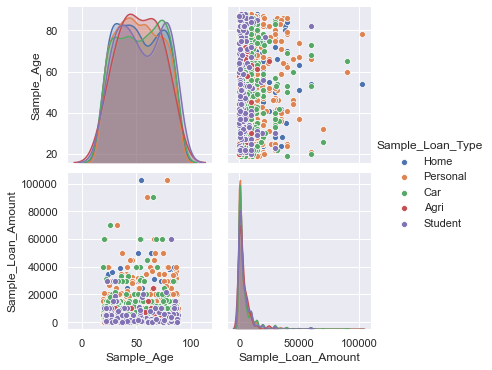

In [41]:
sns.pairplot(sample_df,hue ="Sample_Loan_Type");
#Sample_Loan_Type

In [42]:
sample_df.describe()

,Sample_Age,Sample_Loan_Amount
count,4000.000000,4000.000000
mean,53.094750,4601.923475
std,20.011394,7647.654987
min,19.000000,0.000000
25%,36.000000,700.000000
50%,52.500000,2000.000000
75%,71.000000,5000.000000
max,88.000000,102500.000000


In [43]:
df.describe()

,age,loan_amount
count,3936.000000,3936.000000
mean,45.241362,4755.631979
std,15.595089,8383.672677
min,19.000000,0.000000
25%,32.000000,700.000000
50%,44.000000,2000.000000
75%,57.000000,5000.000000
max,89.000000,102500.000000


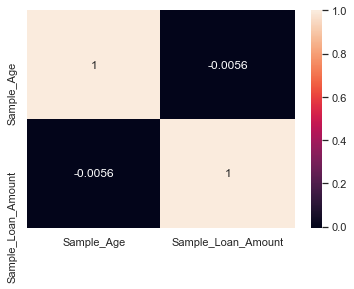

In [44]:
sns.heatmap(sample_df.corr(),annot= True); #insert link here from medium that i used fro below

Do Some Predictions?

Model and Train?

Digging a bit futher - summary by years 